In [1]:
%pylab
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


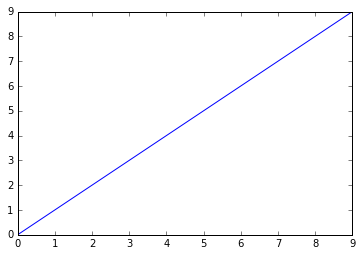

In [2]:
plot(np.arange(10))

In [3]:
close()

In [4]:
# matplotlib的图像都位于Figure对象汇总，用plt.figure创建一个新的Figure
fig = plt.figure() # 会有一个空窗口

In [5]:
#不能通过空Figure绘图，必须使用add_subplot创建一个或多个subplot才行
ax1 = fig.add_subplot(2, 2, 1) # 图像2*2，选择当前4个subplot中的第一个，编号从1开始
# 创建后面两个subplot
ax2 = fig.add_subplot(2, 2, 2) # AxesSubplot对象
ax3 = fig.add_subplot(2, 2, 3)

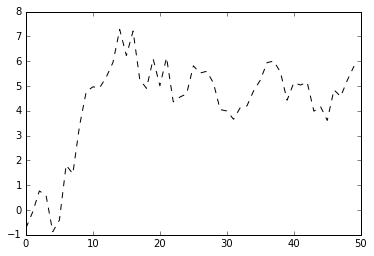

In [6]:
# 此时用绘图命令，matplotlib会在最后一个用过的subplot（如果没有则创建一个）上进行绘制
plt.plot(np.random.randn(50).cumsum(), 'k--') # 会在第三个图上绘制一个虚线

In [7]:
# 在其他格子里画图
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.55)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# 重复执行命令会在原有基础上覆盖图像

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x072B29D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x075832F0>]], dtype=object)

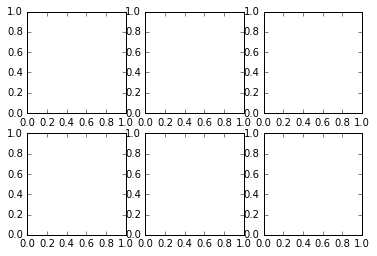

In [8]:
# 由于经常用Figure和Subplot创建布局，所以定了plt.subplots更简单的方法
# 创建一个Figure，并返回一个含有已创建的subplot对象的NumPy数组
fig, axes = plt.subplots(2, 3)
axes # 可以轻松地对axes数组进行索引 axes[0, 1], sharex和sharey指定subplot应该具有相同的X轴或Y轴

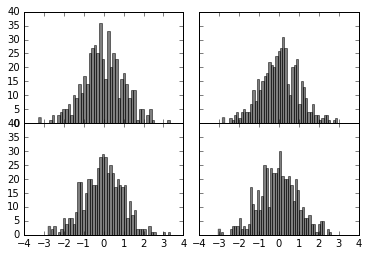

In [9]:
# subplot_adjust(left=None, bottom=None, right=None, top=None,wsapce=None, hspace=None)
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.1, hspace=0) # 宽度和高度间距的百分比，如果为1则间距一个图像大小

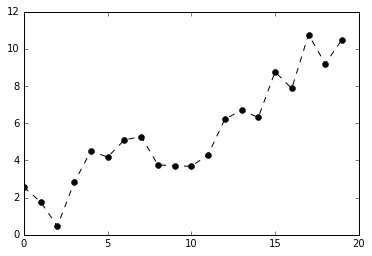

In [10]:
# 颜色、标记、线型
plt.plot(np.random.randn(20).cumsum(), 'ko--')
# 等同 plt.plot(np.random.randn(20).cumsum(), color='k', linestyle='--', marker='o')

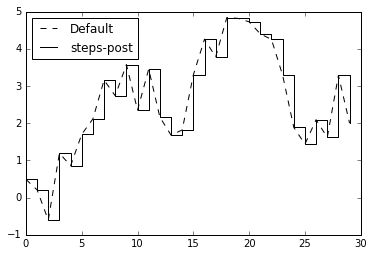

In [11]:
# 在线型图中，非实际数据点默认按线性方式插值，可以通过drawstyle选项修改：
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

plt.legend(loc='best') # 插图说明

## 刻度、标签和图例
大多数图表装饰项，主要方法：
- 使用过程型的pyplot接口（类似MATLAB）
- 更为面向对象的原生matplotlib API

pyplot接口设计的目的就是交互式使用：
- xlim 控制图标的范围
- xticks 刻度位置
- xticklabels 刻度标签

使用方式，两种：
- 调用时不带参数，则返回当前的参数值。例如，plt.xlim()返回当前X轴绘图范围。对应subplot对象的方法，例如ax.get_xlim。
- 调用时带参数，则设置参数值。因此，plt.xlim([0, 10])会将X轴的范围设置为0到10。对应subplot对象的方法，例如ax.set_xlim。

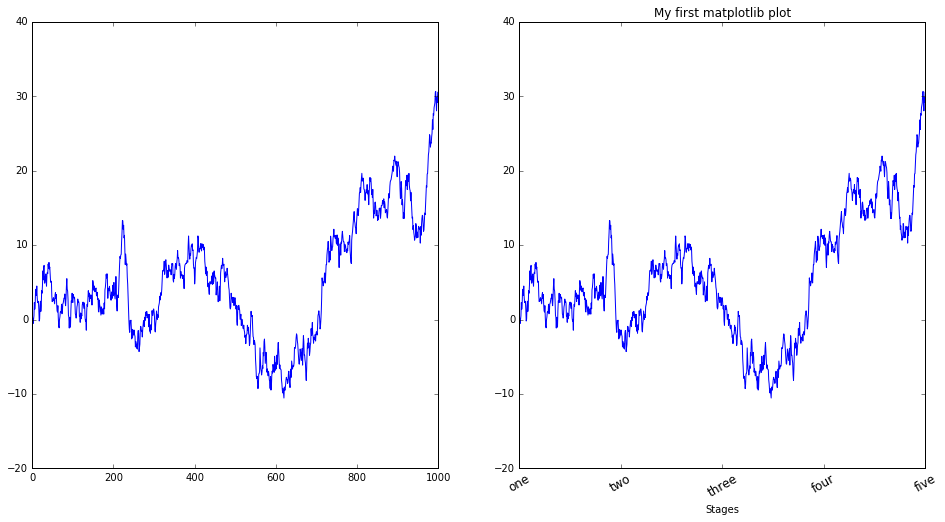

In [12]:
# 设置标题、轴标签、刻度以及刻度标签
fig = plt.figure(figsize=(16,8)); ax1 = fig.add_subplot(1, 2, 1); ax2 = fig.add_subplot(1, 2, 2)
data = np.random.randn(1000)

ax1.plot(data.cumsum())

# 告诉matplotlib刻度放在数据范围中的哪些位置
ticks = ax2.set_xticks([0, 250, 500, 750, 1000])
# 将任何其他值用作标签
labels = ax2.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='large')
# 为X轴设置一个名称，并用set_title设置标题
ax2.set_title('My first matplotlib plot')
ax2.set_xlabel('Stages')
ax2.plot(data.cumsum())

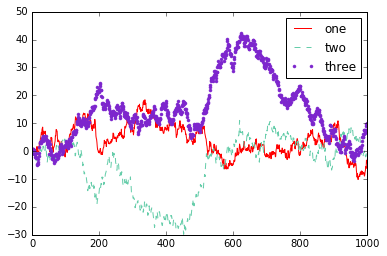

In [13]:
# 添加图例（legend）

# 第一种，天假subplot的时候传入label参数
fig = plt.figure();ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), 'k', color='#FF0000', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', color='#66CDAA',label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', color='#7D26CD',label='three')

# 调用ax.legend或plt.legend()来自动创建图例
ax.legend(loc='best')

## 注解以及在Subplot上绘图
> 除了标准的图表对象以外，绘制一些自定义的注解（比如文本、箭头或其他图形等）。

注解可以通过text、arrow和annotata等函数进行添加。
- text可以将文本绘制在图表的指定坐标(x, y)，还可加自定义格式

```python
ax.text(x, y, 'Hello world!', family='monospace', fontsize=12)
```

注解中既可以含有文本也可以含有箭头。

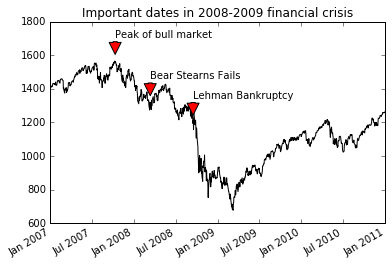

In [14]:
# 根据2007年以来的标准普尔500指数收盘价格（来自yahoo!fiance）绘制一张曲线图
# 并标出2008年到2009年金融危机期间的一些重要日期
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('old-file/ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
               xytext=(date, spx.asof(date) + 200),
               arrowprops=dict(facecolor='red'),
               horizontalalignment='left', verticalalignment='top')
    
# 放大到2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

### 图形绘制
表示图形的对象，块（patch）。有些可以在matplotlib.pyplot中（Rectangle和Circle），完整集合位于matplotlib.patches。

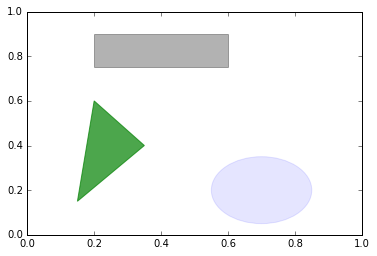

In [15]:
# 首先，创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 对象shp
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.1)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.7)

# 添加到图像中
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图表保存到文件
利用plt.savefig可以将当前图表保存到文件。= Figure对象的实例方法savefig
```python
plt.savefig('figpath.svg') # 将图像保存为svg文件
```

图片选项：
- dpi 每英寸点数
- bbox_inches 可以剪除当前图表周围的空白部分
```python
# 得到一张带有最小白边且分表率为400DPI的PNG图片
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

savefig不一定要写入磁盘，也可以写入任何文件型的对象，比如StringIO：
```python
from io import StringIO
buffer = StringIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```
这对在**Web上提供动态生成的图片**是很实用的。

Figure.savefig的选项

| **参数** | **说明** |
|-|-|
| fname | 含有文件路径的字符串或python的文件型对象。图像格式由文件扩展名推断得出，例如，.pdf推断出PDF，.png推断出PNG |
| dpi | 图像分辨率（每英寸点数），默认为100 |
| facecolor、edgecolor | 图像的背景色，默认为“w”白色 |
| format | 显示设置文件格式 |
| bbox_inches | 图表需要保存的部分。如果设置为“tight”，则将尝试剪除图表周围的空白部分 |

### matplotlib配置
matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息。所有默认行为都能通过一组全局参数进行自定义，它可以管理：
- 图像大小
- subplot边距
- 配色方案
- 字体大小
- 网格类型等

操作方式，2种：
- Python编程方式，即利用rc方法，如将全局的图像默认大小设为10*10
    ```python
        plt.rc('figure', figsize=(10, 10))
    ```
- rc的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等。其后可以跟上一些列的关键字参数，最简单的是写成一个字典：
    ```python
        font_options = {'family': 'monospace',
                  'weight': 'bold',
                  'size': 'small'}
        plt.rc('font', **font_options)
    ```
    
> 要了解全部的自定义选项，请查阅matplotlib的配置文件maplotlibrc（位于matplotlib/mpl-data目录中）。如果自定义了改文件，并放在自己的.matplolib目录中，则每次使用matplotlib时就会加载该文件。
    

## pandas中的绘图函数
不难看出，matplotlib是一种低级的工具，要组装一张图表，要用到它的各种基础组件才行：数据展示（即图表类型）、图例、标题、刻度标签以及其他注解型信息。

> pandas正在改进绘图功能，更多的学习文档可以见Pandas的[在线文档](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

### 线型图
Series和DataFrame都有一个用于生成各类图表的plot方法，默认生成的是线型图。

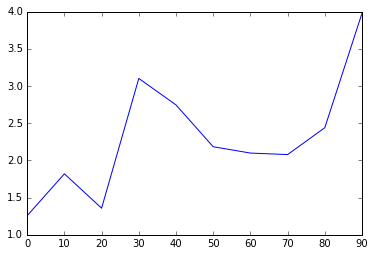

In [16]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()
# 该Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过use_index=False禁用该功能
# 刻度和界限可以通过xticks和xlim选项调节，Y轴同理

Series.plot方法的参数

| **参数** | **说明**|
|-|-|
| label | 用于图例的标签 |
| ax | 要在其上进行绘制的matplotlib subplot对象。如果没有设置，则使用当前matplotlib subplot |
| style | 将要传给matplotlib的风格字符串（如'ko--'） |
| alpha | 图表的填充不透明度（0-1） |
| kind | 可以是'line' 'bar' 'barh' 'kde' |
| logy | 在Y轴上使用对数标尺 |
| use_index | 将对象的索引用作刻度标签 |
| rot | 旋转刻度标签（0-360） |
| xticks | 用作X轴刻度的值 |
| yticks | 用作Y轴刻度的值 |
| xlim | X轴的界限（如[0, 10]） |
| grid | 显示轴网格线（默认打开） |

DataFrame有一些用于对咧进行灵活处理的选项，如，是要将所有列都绘制到一个subplot还是创建各自的subplot

专用于DataFrame的plot参数

| **参数** | **说明**|
|-|-|
| subplots | 将各个DataFrame列绘制到单独的subplot中 |
| sharex | 如果subplots=True，则共用同一个X轴，包括刻度和界限 |
| sharey | 如果subplots=True，则共用同一个Y轴 |
| figsize | 表示图像大小的元组 |
| title | 表示图像标题的字符串 |
| legend | 添加一个subplot图例（默认为True） |
| sort_columns | 以字母表顺序绘制各列，默认使用当前列顺序 |

---
**注意：**有关时间序列的绘制技术，请参见第10章

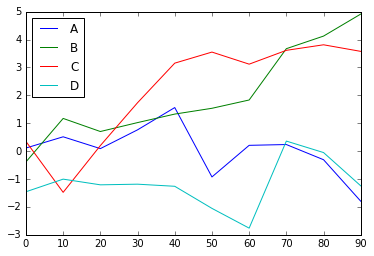

In [17]:
# DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例：
df = DataFrame(np.random.randn(10, 4).cumsum(0),
              columns=list('ABCD'),
              index=np.arange(0, 100, 10))
df.plot()

### 柱状图
在生成线型图的代码中加入kind='bar'（垂直柱状图）或kind='barh'（水平柱状图）即可，这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度。

**注意：** 柱状图还有一个用法：利用value_counts图形化显示Series中各值的出现频率，比如s.value_counts().plot(kind='bar')

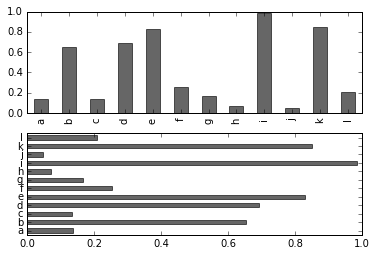

In [18]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(12), index=list('abcdefghijkl'))

data.plot(kind='bar', ax=axes[0], color='k', alpha=0.6)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.6)

对于DataFrame，柱状图会将每一行的值分为一组

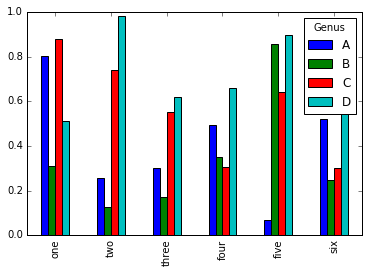

In [19]:
# 各列的名称“Genus”被用作了图例的标题。
df = DataFrame(np.random.rand(6, 4),
              index=['one', 'two', 'three', 'four', 'five', 'six'],
              columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot(kind='bar')

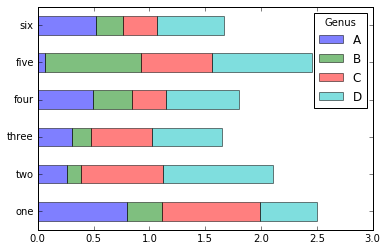

In [20]:
# 设置stacked=True可为DataFrame生成堆积柱状图
df.plot(kind='barh', stacked=True, alpha=0.5)

以消费的数据集为例，做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比，用read_csv加载数据，然后根据日期和聚会规模创建一张交叉表：

In [21]:
tips = pd.read_csv('old-file/ch08/tips.csv')

tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [22]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [23]:
# 1/6个人的聚会都比较少，排除
party_counts = party_counts.ix[:, 2:5]
# 归一化，并转化成浮点数，避免整除问题
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


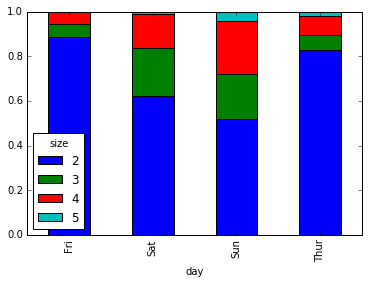

In [24]:
# 该数据集可以看出，聚会规模在周末会变大
party_pcts.plot(kind='bar', stacked=True)

### 直方图和密度图

直方图（histogram）是一种可以对值平率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。

再以前面那个小费数据为例，通过Series的hist方法，我们可以生成一张“小费占小费总额百分比”的直方图。

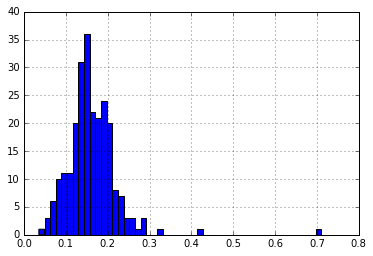

In [25]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

与此相关的一种图表类型是密度图，通过计算‘可能会产生观测数据的连续概率分布的估计’而产生的。也称作KDE（Kernel Density Estimate，核密度估计）图。

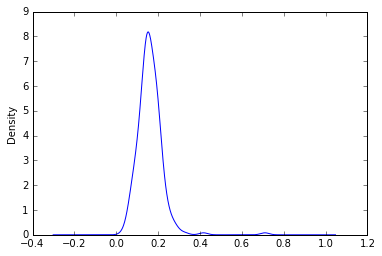

In [26]:
# 调用plot是加上kind=‘kde’
tips['tip_pct'].plot(kind='kde')

这两种图表常常会被画在一起。直方图以规格化形式给出（以便给出面元化密度），然后再在其上绘制核密度估计。

由两个不同标准正太分布组成的双峰分布：

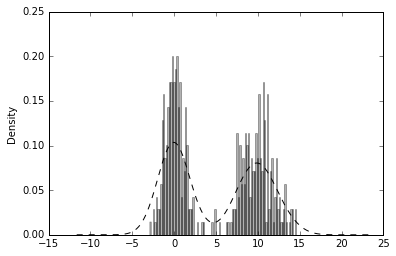

In [27]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)
comp2 = np.random.normal(10, 2 , size=200) # N(10, 4)

values = Series(np.concatenate([comp1, comp2]))

values.hist(bins=100, alpha=0.3, color='k', normed=True) # normed选项，规格化

values.plot(kind='kde', style='k--')

### 散布图
散布图（scater plot）是观察两个一维数据序列之间的关系的有效手段。matplotlib的scatter方法是绘制散布图的主要方法。下面这个例子中，加载了来自statsmodels项目的macrodata数据集，选择其中几列，然后计算对数差：

In [28]:
macro = pd.read_csv('old-file/ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data =np.log(data).diff().dropna()

trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


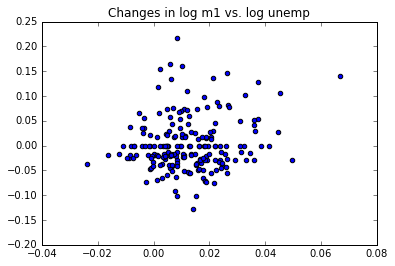

In [29]:
# 利用plt.scatter绘制简单的散布图
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。pandas提供了一个能从DataFrame创建散布图矩阵的scatter_matrix函数，还支持在对角线上防止各变量的直方图或密度图。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09B143D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0BBEA1B0>]], dtype=object)

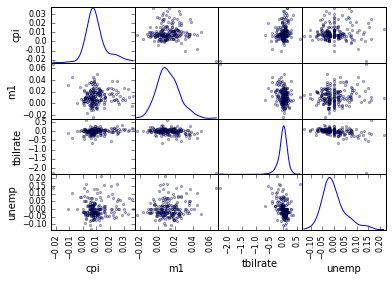

In [30]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## 绘制地图：图形化显示海地地震危机数据
> Ushahidi是一家非营利软件公司，人们可以向起提供有关自然灾害和地缘政治事件的信息，这些数据集会被发布在[他们的网站](http://community.ushahidi.com/research/datasets/)上以供分析和图形化。

下载了2010年海地地震及其余震期间收集的数据。先用pandas处理数据集，为分析和图形化工作做准备。


In [31]:
# 加载到DataFrame中
data = pd.read_csv('old-file/ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 182.5+ KB


In [32]:
# 哪些是想要的？
# 每一行表示一条从某人手机发送的紧急或其他问题报告。每条报告都有一个时间戳和位置（经纬度）
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [33]:
# CATEGORY字段含有一组以逗号分隔的代码，表示消息的类型：
data['CATEGORY'].head()

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
Name: CATEGORY, dtype: object

In [34]:
# 观察数据摘要，就能发现分类信息部分缺失了，因此需要丢弃这些数据点
# 调用describe发现数据中存在一些异常的地理位置：
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [35]:
# 清楚错误位置信息并移除缺失分类信息是一件很简单的事情：
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20)
           & (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
           & data.CATEGORY.notnull()]

In [36]:
# 想根据分类对数据做一些分析或图形化工作，但是有多个分类
# 首先，对数据做一些规整化处理。
# 两个函数，一个用于或缺所有分类的列表，另外一个将各个分类信息拆分为编码和英语名称：

def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [37]:
# 测试get_english函数是否正常：
get_english('2. Urgences logistques | Vital LIneds')

('2', 'Vital LIneds')

In [38]:
# 做一个编码跟名称映射起来的字典，等会儿会用到编码进行分析
# 此处用的是生成器表达式，非列表推导式
all_cats = get_all_categories(data.CATEGORY)
english_mapping = dict(get_english(x) for x in all_cats)

english_mapping['2a']

'Food Shortage'

In [39]:
english_mapping['6c']

'Earthquake and aftershocks'

根据分类选取记录的方式有很多，其中之一是添加指标（或哑变量）列，每个分类一列。为此，我们首先抽取出唯一的分类编码，并构造一个全零DataFrame（列为分类编码，索引跟data的索引一样）

In [40]:
all_cats[:5]

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire']

In [41]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index,
                        columns=code_index)

In [42]:
dummy_frame.ix[:6, :6]

,1,1a,1b,1c,1d,2
0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# 将各行中适当的项设置为1，然后与data连接：
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1
    
data = data.join(dummy_frame.add_prefix('category_'))

In [52]:
data.ix[:, 10:15]

,category_1,category_1a,category_1b,category_1c,category_1d
0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0


空间坐标数据，绘制在海地的地图上。basemap工具集（matplotlib的一个插件）让Python在地图上绘制2D数据。basemap提供了许多不同的地球投影以及一种将地球的经纬度坐标投影转换为二维matplotlib图的方式。

绘制一张简单的黑白海地地图：

In [48]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    # 创建极球面投影的Basemap实例
    m = Basemap(ax=ax, projection='stere',
               lon_0=(urlon + lllon) / 2,
               lat_0=(urlat + lllat) / 2,
               llcrnrlat=lllat, urcrnrlat=urlat,
               llcrnrlon=lllon, urcrnrlon=urlon, 
               resolution='f')
    # 绘制海岸线、州界、国界以及地图边界
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

如何让返回的Basemap对象知道该怎么将坐标转换到画布上。
对于每一个分类，在数据集中找到对应的坐标，并在适当的subplot中绘制一个Basemap，转换坐标，然后通过Basemap的plot方法绘制点：

> +.. warning::
 +
 +   In 0.13.0 since ``Series`` has internaly been refactored to no longer sub-class ``ndarray``
 +   but instead subclass ``NDFrame``, you can **not pass** a ``Series`` directly as a ``ndarray`` typed parameter
 +   to a cython function. Instead pass the actual ``ndarray`` using the ``.values`` attribute of the Series.
 +
 +   Prior to 0.13.0
 +
 +   .. code-block:: python
 +
 +        apply_integrate_f(df['a'], df['b'], df['N'])
 +
 +   Use ``.values`` to get the underlying ``ndarray``
 +
 +   .. code-block:: python
 +
 +        apply_integrate_f(df['a'].values, df['b'].values, df['N'].values)

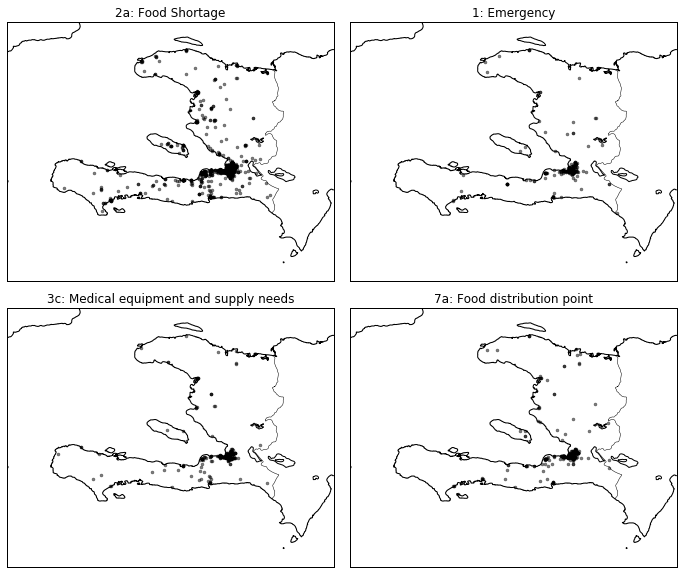

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
    cat_data = data[data['category_%s' % code] == 1]
    
    # 计算地图的投影坐标
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values) # 
    
    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

大部分数据都集中在人口最稠密的城市——太子港。basemap可以叠加来自shapefile的地图数据，先下载一个带有太子港道路的shapefile。Basemap对象有一个非常方便的readshapefile方法：

In [55]:
shapefile_path = 'old-file/ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x1e63be30>)

## Python图形化工具生态系统
建议研究一下整个生态系统

### Chaco

### mayavi

### 其他库

### 图形化工具的未来
基于Web技术（比如JavaScript）的图形化是必然的发展趋势。
d3.js